In [1]:
import taufactor
import tifffile
import numpy as np
import matplotlib.pyplot as plt
# Note you should unzip TF-500x500x500-1x2x6-v3.tiff.zip and move the tiff file into examples
img = tifffile.imread('TF-500x500x500-1x2x6-v3.tiff')
# Always check the image shape and values in the array before running
print(img.shape)
print(np.unique(img))


(500, 500, 500)
[  0 255]


Here we have a 500x500x500 image. Note that if you have a stack of images,
you should load them one by one and use np.concatenate to make a 3D array. 

We also have 2 values, 0 and 255 in our array. We need to turn these into 0s and 1s, then we can make a solver/

In [2]:
# set 255 values to 1
img[img==255] = 1
solver = taufactor.Solver(img)
tau0 = solver.solve()

converged to: 4.242071628570557                   after: 2401 iterations in: 63.9358                    seconds at a rate of 0.0266 s/iter


Nice, we have tau in the 0th dimension of the image, we can check the other two as well

In [3]:
solver = taufactor.Solver(np.transpose(img, (1,0,2)))
tau1 = solver.solve()
solver = taufactor.Solver(np.transpose(img, (2,0,1)))
tau2 = solver.solve()
print(tau0, tau1, tau2)

converged to: 1.1513475179672241                   after: 701 iterations in: 18.6179                    seconds at a rate of 0.0266 s/iter
converged to: 1.3905668258666992                   after: 801 iterations in: 21.2871                    seconds at a rate of 0.0266 s/iter
tensor(4.2421, device='cuda:0') tensor(1.1513, device='cuda:0') tensor(1.3906, device='cuda:0')


Now lets try the multiphase solver. First we will set some of the values in the image to have a diffusion value of 2.

[0 1 2]


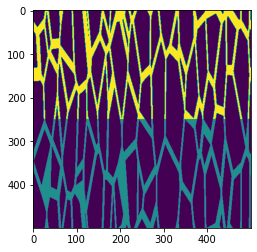

In [4]:
# solve in dim 1 cus it's faster and we are impatient
img2 = np.transpose(img, (1,0,2))
# Set some values to equal 2
img2[:250] *= 2
plt.imshow(img2[:,:,0])
print(np.unique(img2))

Now we solve using multiphase solver, with phase 0 non-conductive by default, phase 1 conductivity 1, phase 2 conductivity 5

In [5]:
mpsolver = taufactor.MultiPhaseSolver(img2, cond={1:1, 2:5})
mpsolver.solve()


converged to: 2.102311372756958                   after: 2500 iterations in: 108.1555                    seconds at a rate of 0.0433 s/iter


tensor(2.1023)